In [1]:
import pandas as pd

In [9]:
df_mttext = pd.read_csv('data/mtsamples.csv').drop('Unnamed: 0',axis=1)
df_mttext

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [11]:
df_mttext[df_mttext['description'].str.contains('pneumonia')].count()

description          48
medical_specialty    48
sample_name          48
transcription        48
keywords             30
dtype: int64

In [7]:
df_mttext.medical_specialty.unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielmendoza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmendoza/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/danielmendoza/nltk_data...


Notebook configuration complete!
Processing X-ray image data:
Train set:
  NORMAL: 1341 images
  PNEUMONIA: 3875 images
Test set:
  NORMAL: 234 images
  PNEUMONIA: 390 images
Val set:
  NORMAL: 8 images
  PNEUMONIA: 8 images

Visualizing sample X-ray images:


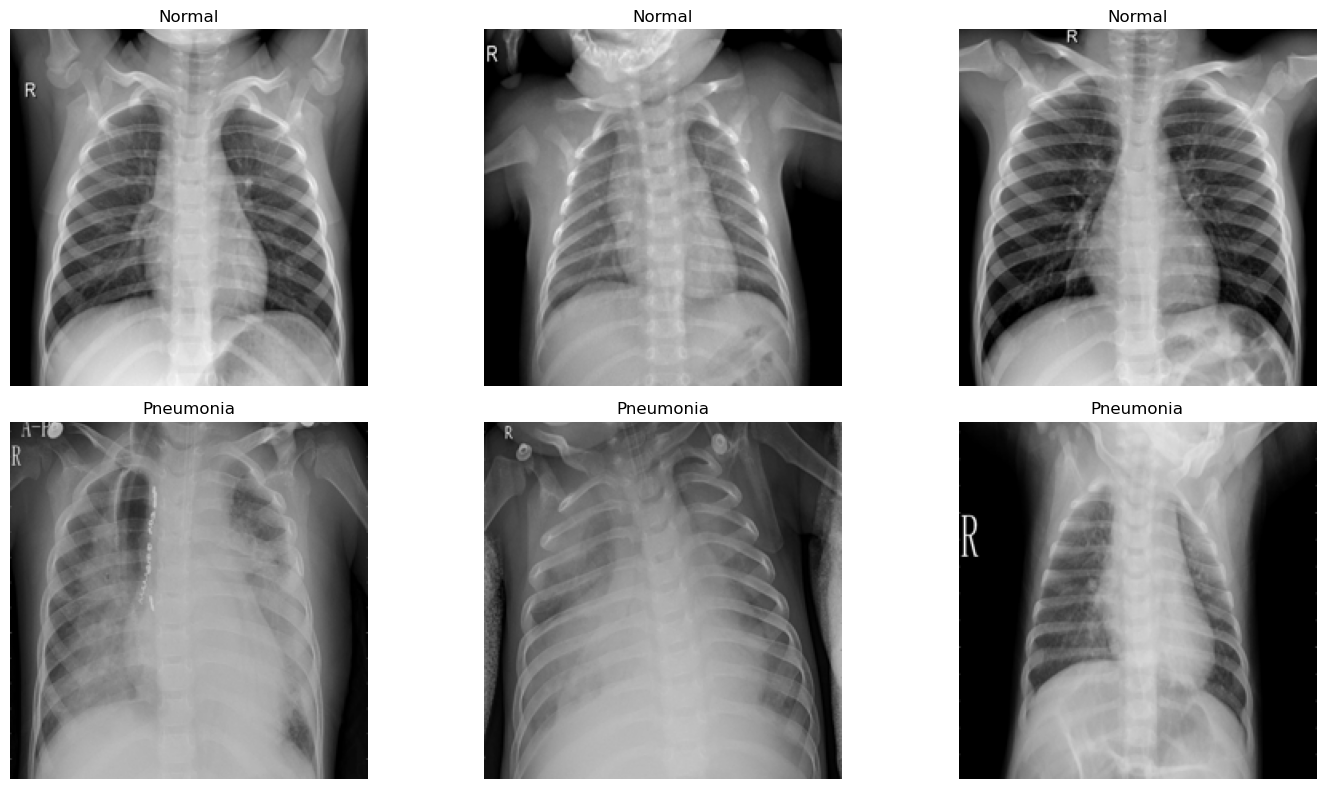


Loading MTSamples dataset:
Dataset shape: (4999, 6)

Columns:
- Unnamed: 0
- description
- medical_specialty
- sample_name
- transcription
- keywords

Sample data:
   Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary           

/var/folders/t2/4bjd9r9s54bcc7lxgnx_rt3c0000gn/T/ipykernel_15823/2644440206.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_samples['processed_text'] = relevant_samples['transcription'].apply(preprocess_text_simple)


In [14]:
# Multimodal Medical Diagnosis System - Data Preparation
# MVP for Pneumonia Detection using X-rays and Medical Transcriptions

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import re

# For text processing - with necessary NLTK downloads
import nltk
# Download needed NLTK packages first!
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# For image processing
from skimage import io
from skimage.transform import resize

# For model preparation
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Define paths
base_path = 'data'
chest_xray_path = os.path.join(base_path, 'chest_xray')
mtsample_path = os.path.join(base_path, 'mtsamples.csv')

print("Notebook configuration complete!")

# 1. Image Data Processing - Using existing structure

def process_existing_xray_structure(base_path):
    """Process X-ray images with existing train/test/val directories."""
    dataset_info = {}
    
    # Process each split (train, test, val)
    for split in ['train', 'test', 'val']:
        split_path = os.path.join(base_path, split)
        if not os.path.exists(split_path):
            print(f"Warning: {split} directory not found")
            continue
        
        normal_path = os.path.join(split_path, 'NORMAL')
        pneumonia_path = os.path.join(split_path, 'PNEUMONIA')
        
        # Count images in each class
        if os.path.exists(normal_path):
            normal_images = [f for f in os.listdir(normal_path) 
                            if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        else:
            normal_images = []
            
        if os.path.exists(pneumonia_path):
            pneumonia_images = [f for f in os.listdir(pneumonia_path) 
                              if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        else:
            pneumonia_images = []
        
        # Store paths and labels
        normal_paths = [os.path.join(normal_path, img) for img in normal_images]
        pneumonia_paths = [os.path.join(pneumonia_path, img) for img in pneumonia_images]
        
        all_paths = normal_paths + pneumonia_paths
        all_labels = [0] * len(normal_paths) + [1] * len(pneumonia_paths)
        
        dataset_info[split] = {
            'paths': all_paths,
            'labels': all_labels,
            'normal_count': len(normal_images),
            'pneumonia_count': len(pneumonia_images)
        }
        
        print(f"{split.capitalize()} set:")
        print(f"  NORMAL: {len(normal_images)} images")
        print(f"  PNEUMONIA: {len(pneumonia_images)} images")
    
    return dataset_info

# Process the image data
print("Processing X-ray image data:")
image_data = process_existing_xray_structure(chest_xray_path)

# Create a function to load and preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    """Load and preprocess an image for deep learning models."""
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize to [0,1]
    return img_array

# Visualize sample images from each class
def visualize_samples(dataset_info, split='train', num_samples=3):
    """Visualize sample images from each class."""
    if split not in dataset_info:
        print(f"Split '{split}' not found in dataset")
        return
    
    paths = dataset_info[split]['paths']
    labels = dataset_info[split]['labels']
    
    pneumonia_indices = [i for i, label in enumerate(labels) if label == 1]
    normal_indices = [i for i, label in enumerate(labels) if label == 0]
    
    pneumonia_samples = random.sample(pneumonia_indices, min(num_samples, len(pneumonia_indices)))
    normal_samples = random.sample(normal_indices, min(num_samples, len(normal_indices)))
    
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 8))
    
    for i, idx in enumerate(normal_samples):
        img = preprocess_image(paths[idx])
        axes[0, i].imshow(img)
        axes[0, i].set_title('Normal')
        axes[0, i].axis('off')
    
    for i, idx in enumerate(pneumonia_samples):
        img = preprocess_image(paths[idx])
        axes[1, i].imshow(img)
        axes[1, i].set_title('Pneumonia')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize sample images
print("\nVisualizing sample X-ray images:")
visualize_samples(image_data)

# 2. Text Data Processing

# Load the MTSamples dataset
def load_mtsamples():
    """Load and display info about the MTSamples dataset."""
    df = pd.read_csv(mtsample_path)
    print(f"Dataset shape: {df.shape}")
    print("\nColumns:")
    for col in df.columns:
        print(f"- {col}")
    print("\nSample data:")
    return df

print("\nLoading MTSamples dataset:")
mtsamples_df = load_mtsamples()
print(mtsamples_df.head())

# Helper function to find pneumonia/respiratory related samples
def find_relevant_samples(df, keywords, column='transcription'):
    """Find samples containing relevant keywords."""
    pattern = '|'.join(keywords)
    mask = df[column].str.contains(pattern, case=False, na=False)
    return df[mask]

# Define relevant keywords for pneumonia
pneumonia_keywords = [
    'pneumonia', 'lung infection', 'chest infection', 'respiratory infection',
    'infiltrate', 'consolidation', 'pulmonary', 'respiratory'
]

# Filter relevant samples
print("\nFiltering for pneumonia-related text data:")
relevant_samples = find_relevant_samples(mtsamples_df, pneumonia_keywords)
print(f"Number of relevant samples found: {len(relevant_samples)}")

# Preprocess text data - simplified version without lemmatization
def preprocess_text_simple(text):
    """Basic text preprocessing without using WordNet lemmatizer."""
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing to all relevant samples
print("\nPreprocessing text data:")
relevant_samples['processed_text'] = relevant_samples['transcription'].apply(preprocess_text_simple)

# Example text preprocessing
if len(relevant_samples) > 0:
    sample_text = relevant_samples.iloc[0]['transcription']
    print("\nOriginal text sample:")
    print(sample_text[:500], "...\n")
    
    processed_text = preprocess_text_simple(sample_text)
    print("Processed text sample:")
    print(processed_text[:500], "...")

# 3. Save Processed Data
def save_data_splits(image_data, text_data, output_dir='processed_data'):
    """Save the processed data for later use."""
    os.makedirs(output_dir, exist_ok=True)
    
    # Save image paths and labels
    for split_name, split_data in image_data.items():
        split_dir = os.path.join(output_dir, split_name)
        os.makedirs(split_dir, exist_ok=True)
        
        # Save image paths and labels
        pd.DataFrame({
            'image_path': split_data['paths'],
            'label': split_data['labels']
        }).to_csv(os.path.join(split_dir, 'image_data.csv'), index=False)
    
    # Save text data
    text_data.to_csv(os.path.join(output_dir, 'processed_text.csv'), index=False)
    
    print(f"Data saved to {output_dir}")

# Save the processed data
print("\nSaving processed data:")
save_data_splits(image_data, relevant_samples)

# 4. Summary and Next Steps
print("\nData Preparation Summary:")
print("1. Processed X-ray images from existing train/val/test splits")
print("2. Identified relevant text samples from MTSamples")
print("3. Saved processed data for model training")
print("\nNext Steps:")
print("1. Train baseline models for each modality")
print("2. Design fusion architecture")
print("3. Evaluate combined model performance")